In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import os

In [3]:
df = pd.read_csv('pokemon.csv')
df.shape

(809, 3)

In [4]:
df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [5]:
df2 = df.sort_values(by=['Name'], ascending=True).reset_index(drop=True)
df2.head()

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,NaN
2,absol,Dark,NaN
3,accelgor,Bug,NaN
4,aegislash-blade,Steel,Ghost


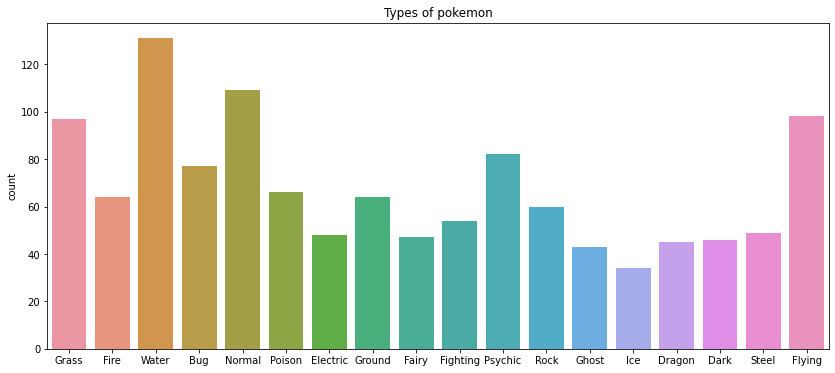

In [6]:
import seaborn as sns

type1 = df['Type1'].tolist()
type2 = df['Type2'].tolist()

typo = type1 + type2

plt.figure(figsize=(14, 6))

sns.countplot(x=typo)
plt.title('Types of pokemon')
plt.show()

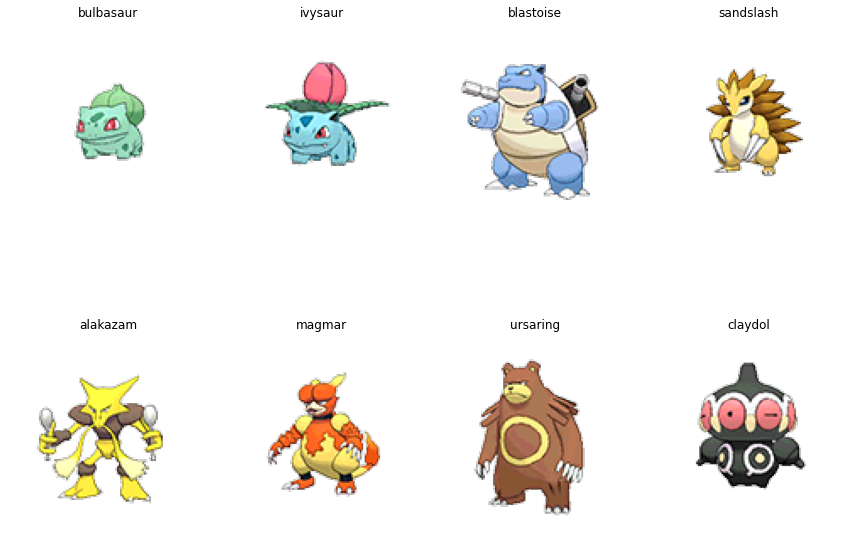

In [7]:
path = 'images/images/'
fig,((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(8):
    img = mpimg.imread(path+df['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(df['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [8]:
path='images/images/'
img_name = sorted(os.listdir('images/images/'))
img_paths = []
for i in img_name:
    img_paths.append(path + i)

In [9]:
df2['filepath'] = img_paths

In [10]:
poke_type = []
code = []

for i in range(df2.shape[0]):
    if (df2.iloc[i]['Type1']=='Grass') or (df2.iloc[i]['Type2']=='Grass'):
        poke_type.append('Grass')
        code.append(1)
    elif (df2.iloc[i]['Type1']=='Water') or (df2.iloc[i]['Type2']=='Water'):
        poke_type.append('Water')
        code.append(2)
    elif (df2.iloc[i]['Type1']=='Fire') or (df2.iloc[i]['Type2']=='Fire'):
        poke_type.append('Fire')
        code.append(3)
    else:
        poke_type.append('NaN')
        code.append('NaN')

In [11]:
df2['type'] = poke_type
df2['code'] = code
new_df = df2.drop(['Type1', 'Type2', 'Name'], axis=1)
new_df = new_df[new_df['type']!='NaN']
new_df.reset_index(drop=True, inplace=True)

In [12]:
new_df.head(2)

,filepath,type,code
0,images/images/abomasnow.png,Grass,1
1,images/images/alomomola.png,Water,2


Text(0, 0.5, 'Number of images')

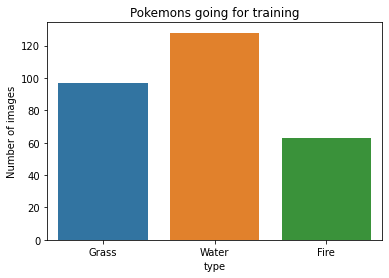

In [13]:
sns.countplot(x=new_df.type)
plt.title('Pokemons going for training')
plt.ylabel('Number of images')

In [14]:
import tensorflow as tf
from tensorflow import keras as ks
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_datagen = ImageDataGenerator(
    
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1
)


train_generator = train_datagen.flow_from_dataframe(
    new_df, 
    x_col='filepath', y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    new_df , x_col='filepath', y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework

Found 260 validated image filenames belonging to 3 classes.
Found 28 validated image filenames belonging to 3 classes.


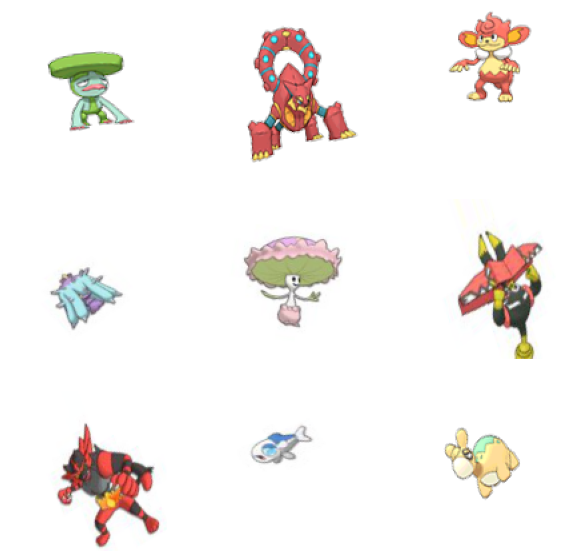

In [15]:
image_sample = train_generator.next()[0]

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_sample[i, :, :, :])
    plt.axis('off')
plt.show()

In [16]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(ks.layers.Conv2D(64, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
#model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(128, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
#model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Conv2D(256, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
#model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(512, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Flatten())

model.add(ks.layers.Dense(1024, activation='relu'))

model.add(ks.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120, 120, 4)       20        
_________________________________________________________________
conv2d (Conv2D)              (None, 114, 114, 64)      12608     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 51, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 256)       1605888   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 256)         0

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.7) and (logs.get('val_acc')>0.7):
            print('\n reached 70% accuarcy so stopping training')
            self.model.stop_training = True
callbacks = myCallback()

In [19]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    batch_size=20, 
    epochs=100,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]   
)

Epoch 1/100
9/9 [==============================] - 6s 629ms/step - loss: 1.3142 - acc: 0.3500 - val_loss: 1.0931 - val_acc: 0.4286
Epoch 2/100
9/9 [==============================] - 1s 140ms/step - loss: 1.0340 - acc: 0.4385 - val_loss: 1.2278 - val_acc: 0.4286
Epoch 3/100
9/9 [==============================] - 1s 135ms/step - loss: 1.1083 - acc: 0.4231 - val_loss: 1.0664 - val_acc: 0.3571
Epoch 4/100
9/9 [==============================] - 1s 122ms/step - loss: 1.0749 - acc: 0.4115 - val_loss: 1.0660 - val_acc: 0.4286
Epoch 5/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0625 - acc: 0.4462 - val_loss: 1.0570 - val_acc: 0.4286
Epoch 6/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0467 - acc: 0.4462 - val_loss: 1.0495 - val_acc: 0.4286
Epoch 7/100
9/9 [==============================] - 1s 122ms/step - loss: 1.0255 - acc: 0.4577 - val_loss: 1.1316 - val_acc: 0.3214
Epoch 8/100
9/9 [==============================] - 1s 134ms/step - loss: 0.9468 - a

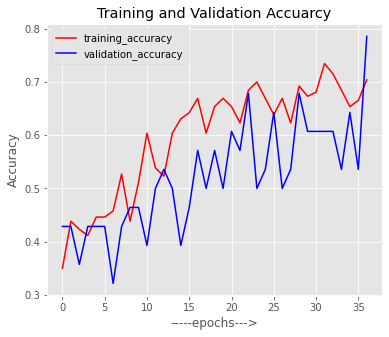

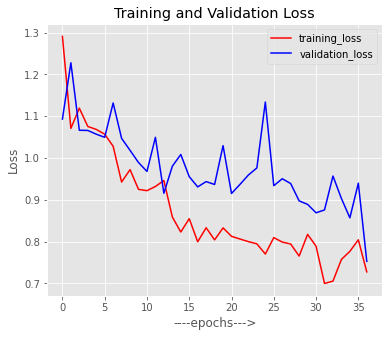

In [20]:
plt.style.use('ggplot')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(6, 5))

plt.plot(epochs, acc, 'r', label='training_accuracy')
plt.plot(epochs, val_acc, 'b', label='validation_accuracy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('-----epochs--->')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(6, 5))

plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('----epochs--->')
plt.ylabel('Loss')
plt.legend()

plt.show()

새로운 CNN

In [21]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(ks.layers.Conv2D(64, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(128, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Conv2D(256, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(512, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Flatten())

model.add(ks.layers.Dense(1024, activation='relu'))

model.add(ks.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 120, 120, 4)       20        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 114, 114, 64)      12608     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 57, 57, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 51, 51, 128)       401536    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 128)      

In [23]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    batch_size=20, 
    epochs=100
)

Epoch 1/100
9/9 [==============================] - 2s 270ms/step - loss: 1.2120 - acc: 0.4308 - val_loss: 1.0668 - val_acc: 0.4286
Epoch 2/100
9/9 [==============================] - 1s 141ms/step - loss: 1.0394 - acc: 0.4462 - val_loss: 1.0294 - val_acc: 0.4286
Epoch 3/100
9/9 [==============================] - 1s 146ms/step - loss: 0.9767 - acc: 0.4654 - val_loss: 0.9319 - val_acc: 0.5000
Epoch 4/100
9/9 [==============================] - 1s 140ms/step - loss: 0.8969 - acc: 0.5385 - val_loss: 0.9356 - val_acc: 0.5000
Epoch 5/100
9/9 [==============================] - 1s 141ms/step - loss: 0.8516 - acc: 0.5538 - val_loss: 0.8840 - val_acc: 0.5000
Epoch 6/100
9/9 [==============================] - 1s 145ms/step - loss: 0.8795 - acc: 0.5808 - val_loss: 0.8896 - val_acc: 0.5357
Epoch 7/100
9/9 [==============================] - 1s 143ms/step - loss: 0.8876 - acc: 0.6115 - val_loss: 0.9327 - val_acc: 0.5714
Epoch 8/100
9/9 [==============================] - 1s 142ms/step - loss: 0.8031 - a

9/9 [==============================] - 1s 140ms/step - loss: 0.5228 - acc: 0.7846 - val_loss: 0.8811 - val_acc: 0.6786
Epoch 64/100
9/9 [==============================] - 1s 140ms/step - loss: 0.4562 - acc: 0.8115 - val_loss: 0.8043 - val_acc: 0.5357
Epoch 65/100
9/9 [==============================] - 1s 140ms/step - loss: 0.5495 - acc: 0.7923 - val_loss: 1.0679 - val_acc: 0.6071
Epoch 66/100
9/9 [==============================] - 1s 140ms/step - loss: 0.5280 - acc: 0.7538 - val_loss: 0.6713 - val_acc: 0.6429
Epoch 67/100
9/9 [==============================] - 1s 140ms/step - loss: 0.4629 - acc: 0.7885 - val_loss: 0.7204 - val_acc: 0.6071
Epoch 68/100
9/9 [==============================] - 1s 140ms/step - loss: 0.4441 - acc: 0.8077 - val_loss: 0.8152 - val_acc: 0.6429
Epoch 69/100
9/9 [==============================] - 1s 140ms/step - loss: 0.3824 - acc: 0.8308 - val_loss: 0.6037 - val_acc: 0.6786
Epoch 70/100
9/9 [==============================] - 1s 140ms/step - loss: 0.3921 - acc: 0

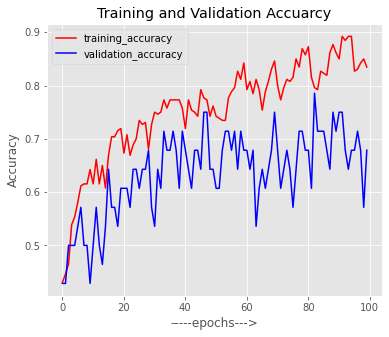

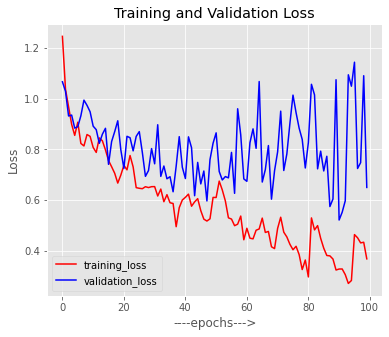

In [24]:
plt.style.use('ggplot')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(6, 5))

plt.plot(epochs, acc, 'r', label='training_accuracy')
plt.plot(epochs, val_acc, 'b', label='validation_accuracy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('-----epochs--->')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(6, 5))

plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('----epochs--->')
plt.ylabel('Loss')
plt.legend()

plt.show()

새로운 CNN 2

In [25]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(ks.layers.Conv2D(64, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(128, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(256, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(512, (7, 7), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Flatten())

model.add(ks.layers.Dense(1024, activation='relu'))
model.add(ks.layers.Dense(512, activation='relu'))

model.add(ks.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 120, 120, 4)       20        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 114, 114, 64)      12608     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 51, 51, 128)       401536    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 19, 19, 256)       1605888   
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 256)        

In [27]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    batch_size=20, 
    epochs=100
)

Epoch 1/100
9/9 [==============================] - 2s 254ms/step - loss: 1.3262 - acc: 0.3423 - val_loss: 1.0811 - val_acc: 0.4286
Epoch 2/100
9/9 [==============================] - 1s 134ms/step - loss: 1.0721 - acc: 0.4462 - val_loss: 1.0484 - val_acc: 0.4286
Epoch 3/100
9/9 [==============================] - 1s 134ms/step - loss: 1.0991 - acc: 0.4462 - val_loss: 1.0679 - val_acc: 0.4286
Epoch 4/100
9/9 [==============================] - 1s 134ms/step - loss: 1.0719 - acc: 0.4462 - val_loss: 1.0679 - val_acc: 0.4286
Epoch 5/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0825 - acc: 0.4462 - val_loss: 1.0525 - val_acc: 0.4286
Epoch 6/100
9/9 [==============================] - 1s 123ms/step - loss: 1.0549 - acc: 0.4462 - val_loss: 1.0979 - val_acc: 0.4286
Epoch 7/100
9/9 [==============================] - 1s 136ms/step - loss: 1.0631 - acc: 0.4462 - val_loss: 1.0739 - val_acc: 0.4286
Epoch 8/100
9/9 [==============================] - 1s 134ms/step - loss: 1.0581 - a

9/9 [==============================] - 1s 132ms/step - loss: 1.0954 - acc: 0.4346 - val_loss: 1.0577 - val_acc: 0.4286
Epoch 64/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0565 - acc: 0.4462 - val_loss: 1.0305 - val_acc: 0.4286
Epoch 65/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0495 - acc: 0.4462 - val_loss: 1.0592 - val_acc: 0.4286
Epoch 66/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0725 - acc: 0.4462 - val_loss: 1.0595 - val_acc: 0.4286
Epoch 67/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0718 - acc: 0.4462 - val_loss: 1.0575 - val_acc: 0.4286
Epoch 68/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0687 - acc: 0.4462 - val_loss: 1.0545 - val_acc: 0.4286
Epoch 69/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0753 - acc: 0.4462 - val_loss: 1.0510 - val_acc: 0.4286
Epoch 70/100
9/9 [==============================] - 1s 133ms/step - loss: 1.0546 - acc: 0

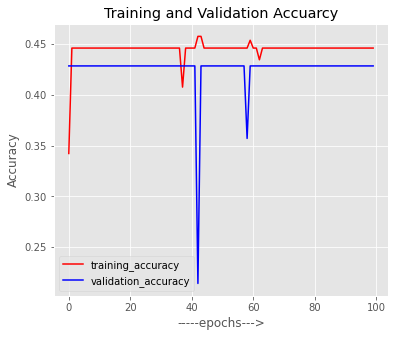

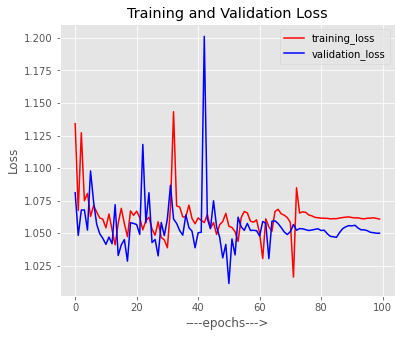

In [28]:
plt.style.use('ggplot')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(6, 5))

plt.plot(epochs, acc, 'r', label='training_accuracy')
plt.plot(epochs, val_acc, 'b', label='validation_accuracy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('-----epochs--->')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(6, 5))

plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('----epochs--->')
plt.ylabel('Loss')
plt.legend()

plt.show()

- dense 층을 늘리니 더 성능이 낮아짐.
- dropout을 추가하니 성능이 올라감.